In [1]:
import os
os.chdir('../')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.externals import joblib
from urllib import urlencode
import matplotlib.pyplot as plt
import lib.yelp_api as yp
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json
import re

%matplotlib inline

In [3]:
yelp_df = pd.read_pickle('data/mtch_srch_rslts_pd.pkl')

In [4]:
yelp_df.head()

,search_name,search_address,bus_id,name,price,cat_1,cat_2,rating,review_count,address,city,zip_code,latitude,longitude,closed
0,#1 CAFE,2080 CENTURY PARK E LOS ANGELES 90067,one-cafe-los-angeles-2,One Cafe,$$,cafes,cafes,3.5,2,2080 Century Park E,Los Angeles,90067,34.058765,-118.412033,False
1,10 - E,811 W 7TH ST LOS ANGELES 90017,10e-los-angeles-6,10e,$$,mediterranean,armenian,4.0,350,811 W 7th St,Los Angeles,90017,34.048981,-118.258957,False
2,101 ASIAN KITCHEN,7170 BEVERLY BLVD LOS ANGELES 90036,101-asian-kitchen-los-angeles,101 Asian Kitchen,$$,chinese,sushi,3.0,39,7170 Beverly Blvd,Los Angeles,90036,34.075880,-118.345730,False
3,101 COFFEE SHOP,6145 FRANKLIN AVE LOS ANGELES 90068,101-coffee-shop-los-angeles,101 Coffee Shop,$$,diners,tradamerican,3.5,960,6145 Franklin Ave,Los Angeles,90028,34.105375,-118.323746,False
5,1880 CAFE,1880 CENTURY PARK E LOS ANGELES 90067,1880-cafe-los-angeles,1880 Cafe,$,newamerican,sandwiches,4.5,71,1880 Century Park E,Los Angeles,90067,34.061840,-118.414243,False


In [5]:
yelp_df['search_address'] = [re.sub(' LOS ANGELES \d+', '', address) for address in yelp_df['search_address']]

In [6]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 2460
Data columns (total 15 columns):
search_name       5892 non-null object
search_address    5892 non-null object
bus_id            5892 non-null object
name              5892 non-null object
price             5693 non-null object
cat_1             5892 non-null object
cat_2             5892 non-null object
rating            5892 non-null float64
review_count      5892 non-null int64
address           5892 non-null object
city              5892 non-null object
zip_code          5892 non-null object
latitude          5892 non-null float64
longitude         5892 non-null float64
closed            5892 non-null bool
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 696.2+ KB


In [7]:
rest_df = pd.read_pickle('data/la_rest_group_df.pkl')

In [8]:
rest_df.head(1)

,facility,address,city,zip_cd,num_at_address,max_seats,phone,risk_level,last_inspect_date,inspect_score,cat,closed_est,year
0,#1 CAFE,2080 CENTURY PARK E,LOS ANGELES,90067,1,30,+1nan,3,2016-08-18,90.0,None,0,2016


In [9]:
cmplt_rest_df = pd.merge(yelp_df, rest_df, right_on=['facility', 'address'], 
                         left_on=['search_name', 'search_address'], how='left')

cmplt_rest_df.head()

,search_name,search_address,bus_id,name,price,cat_1,cat_2,rating,review_count,address_x,...,zip_cd,num_at_address,max_seats,phone,risk_level,last_inspect_date,inspect_score,cat,closed_est,year
0,#1 CAFE,2080 CENTURY PARK E,one-cafe-los-angeles-2,One Cafe,$$,cafes,cafes,3.5,2,2080 Century Park E,...,90067,1,30,+1nan,3,2016-08-18,90.0,None,0,2016
1,10 - E,811 W 7TH ST,10e-los-angeles-6,10e,$$,mediterranean,armenian,4.0,350,811 W 7th St,...,90017,1,150,+12135956653,3,2016-10-19,95.0,None,0,2016
2,101 ASIAN KITCHEN,7170 BEVERLY BLVD,101-asian-kitchen-los-angeles,101 Asian Kitchen,$$,chinese,sushi,3.0,39,7170 Beverly Blvd,...,90036,2,30,+16267803463,3,2016-09-07,90.0,None,0,2016
3,101 COFFEE SHOP,6145 FRANKLIN AVE,101-coffee-shop-los-angeles,101 Coffee Shop,$$,diners,tradamerican,3.5,960,6145 Franklin Ave,...,90068,1,150,+1nan,3,2016-12-22,98.0,None,0,2016
4,1880 CAFE,1880 CENTURY PARK E,1880-cafe-los-angeles,1880 Cafe,$,newamerican,sandwiches,4.5,71,1880 Century Park E,...,90067,2,30,+1nan,2,2016-10-13,90.0,None,0,2016


In [10]:
cmplt_rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5906 entries, 0 to 5905
Data columns (total 28 columns):
search_name          5906 non-null object
search_address       5906 non-null object
bus_id               5906 non-null object
name                 5906 non-null object
price                5707 non-null object
cat_1                5906 non-null object
cat_2                5906 non-null object
rating               5906 non-null float64
review_count         5906 non-null int64
address_x            5906 non-null object
city_x               5906 non-null object
zip_code             5906 non-null object
latitude             5906 non-null float64
longitude            5906 non-null float64
closed               5906 non-null bool
facility             5906 non-null object
address_y            5906 non-null object
city_y               5906 non-null object
zip_cd               5906 non-null object
num_at_address       5906 non-null int64
max_seats            5906 non-null int64
phone        

In [12]:
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ü', 'u')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ñ', 'n')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'Ü', 'u')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'é', 'e')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'è', 'e')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ö', 'o')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'à', 'a')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ä', 'a')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ã', 'a')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'á', 'a')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ō', 'o')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'¢', 'c')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ó', 'o')
cmplt_rest_df['bus_id'] = cmplt_rest_df['bus_id'].str.replace(u'ú', 'u')

In [13]:
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ü', 'u')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ñ', 'n')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'Ü', 'u')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'é', 'e')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'è', 'e')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ö', 'o')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'à', 'a')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ä', 'a')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ã', 'a')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'á', 'a')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ō', 'o')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'¢', 'c')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ó', 'o')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'ú', 'u')
cmplt_rest_df['name'] = cmplt_rest_df['name'].str.replace(u'°C', 'C')

In [14]:
cmplt_rest_df['rating'] = cmplt_rest_df['rating'].fillna(value=0)

In [15]:
ylp_lacnty_df = cmplt_rest_df[cmplt_rest_df['name'] > 0]

In [16]:
ylp_lacnty_df.head()

,search_name,search_address,bus_id,name,price,cat_1,cat_2,rating,review_count,address_x,...,zip_cd,num_at_address,max_seats,phone,risk_level,last_inspect_date,inspect_score,cat,closed_est,year
0,#1 CAFE,2080 CENTURY PARK E,one-cafe-los-angeles-2,One Cafe,$$,cafes,cafes,3.5,2,2080 Century Park E,...,90067,1,30,+1nan,3,2016-08-18,90.0,None,0,2016
1,10 - E,811 W 7TH ST,10e-los-angeles-6,10e,$$,mediterranean,armenian,4.0,350,811 W 7th St,...,90017,1,150,+12135956653,3,2016-10-19,95.0,None,0,2016
2,101 ASIAN KITCHEN,7170 BEVERLY BLVD,101-asian-kitchen-los-angeles,101 Asian Kitchen,$$,chinese,sushi,3.0,39,7170 Beverly Blvd,...,90036,2,30,+16267803463,3,2016-09-07,90.0,None,0,2016
3,101 COFFEE SHOP,6145 FRANKLIN AVE,101-coffee-shop-los-angeles,101 Coffee Shop,$$,diners,tradamerican,3.5,960,6145 Franklin Ave,...,90068,1,150,+1nan,3,2016-12-22,98.0,None,0,2016
4,1880 CAFE,1880 CENTURY PARK E,1880-cafe-los-angeles,1880 Cafe,$,newamerican,sandwiches,4.5,71,1880 Century Park E,...,90067,2,30,+1nan,2,2016-10-13,90.0,None,0,2016


In [17]:
ylp_lacnty_df = ylp_lacnty_df[['bus_id', 'search_name', 'name', 'search_address',  
                               'address_y', 'max_seats', 'risk_level', 'inspect_score', 
                               'price', 'cat_1', 'cat_2', 'zip_code', 'latitude', 
                               'longitude', 'review_count', 'rating', 'closed']]

In [18]:
pd.DataFrame.to_csv(ylp_lacnty_df, 'data/tableau_cmplt_data.csv')

## EDA

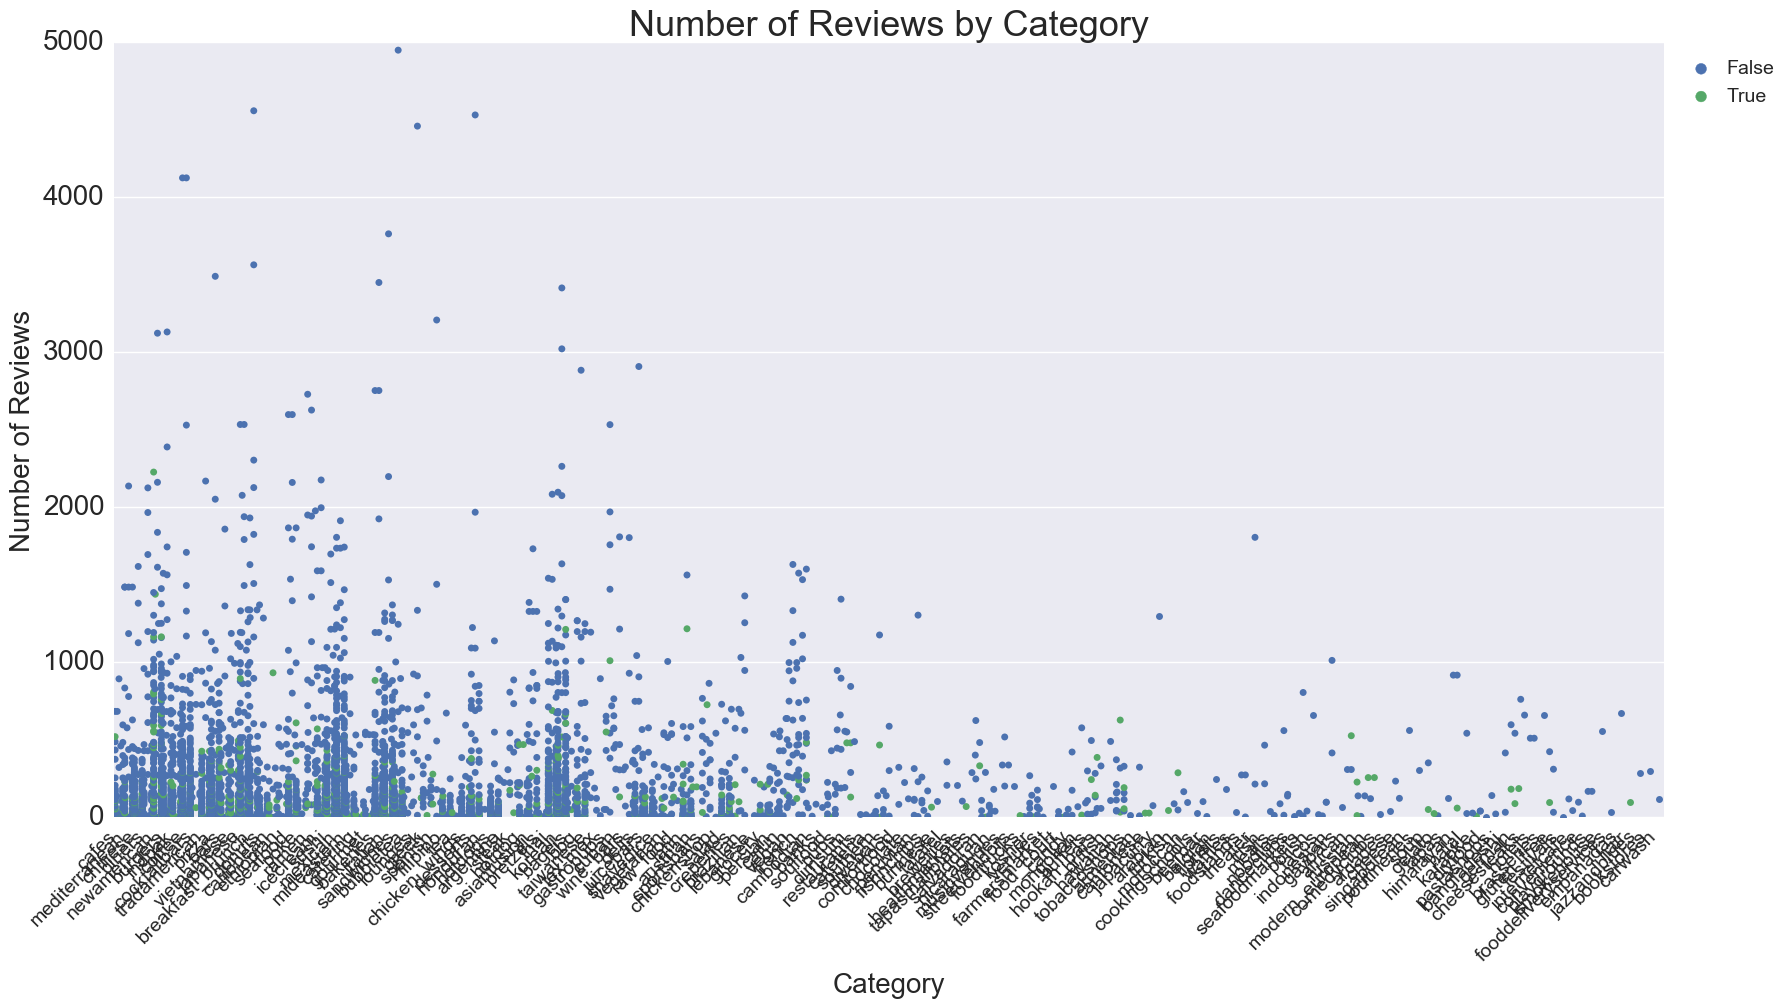

,cat_1,name,review_count
3907,italian,Bottega Louie,12934
749,ramen,Daikokuya Little Tokyo,6788
2472,hotdog,Pink's Hot Dogs,6047
1055,newamerican,Father's Office,5461
2095,icecream,Milk,5245
2434,sandwiches,Philippe the Original,4950
1204,breakfast_brunch,The Griddle Cafe,4559
800,desserts,Diddy Riese Cookies,4532
1281,lounges,Perch,4460
3538,coffee,Urth Caffe - Downtown LA,4126


In [20]:
fig = plt.figure(figsize=(20,10))

sns.swarmplot(x='cat_1', y='review_count', hue='closed', data=ylp_lacnty_df)
plt.xlabel('Category', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
plt.ylim(0, 5000)
plt.title('Number of Reviews by Category', fontsize=26)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, handletextpad = 0.3, fontsize=14)
plt.show()

ylp_lacnty_df[['cat_1', 'name', 'review_count']].sort_values('review_count', ascending=False).head(10)

(0, 3000)

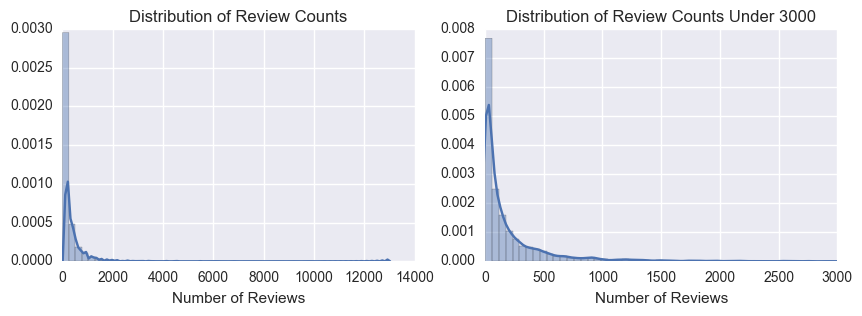

In [23]:
fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,2,1)
sns.distplot(ylp_lacnty_df['review_count'])
plt.xlabel('Number of Reviews')
plt.title('Distribution of Review Counts')
plt.xlim(0, 14000)

fig.add_subplot(1,2,2)
sns.distplot(ylp_lacnty_df[ylp_lacnty_df['review_count'] < 3000]['review_count'])
plt.xlabel('Number of Reviews')
plt.title('Distribution of Review Counts Under 3000')
plt.xlim(0,3000)